# Wordle Statistics
Wordle is a web-based game where a player had 6 chances to guess a random five letter word with feedback from each guess in the form of colored tiles to indicate a wrong letter, correct letter and wrong position, and correct letter and correct position.
Here we will visualize the rates of where each letter of the english alphabet falls in a five letter word, given a dataset of 2500 five letter words.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing packages, numpy for arithmetic, pandas for handling databases, and matplotlib for plotting.

Questions I have:
1. What is the frequency of each letter overall and in each slot?
2. How does each dataset differ and what do the differences tell us?
3. How many double letters are there, and which are most likely to be double letters?
4. Which letters are the most common to appear together in pairs or trios?
5. Which letters don't appear together in pairs or trios?

In [17]:
df_valid_guesses = pd.read_csv("/content/valid_guesses.csv")
df_valid_solutions = pd.read_csv("/content/valid_solutions.csv")

df_answers_txt = pd.read_csv("/content/Wordles.txt", header=None)
df_answers = pd.DataFrame(df_answers_txt)

In [8]:
print("Number of valid wordle guesses:", len(df_valid_guesses), "\nNumber of valid wordle solutions:",len(df_valid_solutions), "\nNumber of past wordle solutions:",len(df_answers))

Number of valid wordle guesses: 10657 
Number of valid wordle solutions: 2315 
Number of past wordle solutions: 200


In [9]:
df_vg = df_valid_guesses['word'].str.split('',n=5,expand=True)
del(df_vg[0])
df_vs = df_valid_solutions['word'].str.split('',n=5,expand=True)
del(df_vs[0])
df_pw = df_answers[0].str.split('',n=5,expand=True)
del(df_pw[0])

In [10]:
df_vg_count = df_vg.apply(pd.Series.value_counts)
df_vg_count[6] = df_vg_count.sum(1)
df_vg_count = df_vg_count.fillna(0)

df_vs_count = df_vs.apply(pd.Series.value_counts)
df_vs_count[6] = df_vs_count.sum(1)
df_vs_count = df_vs_count.fillna(0)

df_pw_count = df_pw.apply(pd.Series.value_counts)
df_pw_count[6] = df_pw_count.sum(1)
df_pw_count = df_pw_count.fillna(0)

df_vg_count

,1,2,3,4,5,6
a,596,1959,929,911,616,5011
b,736,65,278,219,48,1346
c,724,136,336,259,96,1551
d,574,64,315,402,705,2060
e,231,1386,705,2009,1098,5429
f,462,16,153,198,56,885
g,523,64,297,347,102,1333
h,420,402,111,207,231,1371
i,131,1181,785,722,269,3088
j,182,9,43,27,3,264


In [11]:
df_vg_freq = df_vg_count
df_vs_freq = df_vs_count
df_pw_freq = df_pw_count

def calcFrac(df_freq, df_count):    
    for i in range(1, 7):
        df_freq[i] = df_count[i]/sum(df_count[i])*100
    df_freq.reset_index(inplace=True)
    df_freq['index'] = df_freq['index'].str.upper()
calcFrac(df_vg_freq, df_vg_count)
calcFrac(df_vs_freq, df_vs_count)
calcFrac(df_pw_freq, df_pw_count)

df_vs_freq

,index,1,2,3,4,5,6
0,A,6.090713,13.131749,13.261339,7.041037,2.764579,8.457883
1,B,7.473002,0.691145,2.462203,1.036717,0.475162,2.427646
2,C,8.552916,1.727862,2.419006,6.565875,1.339093,4.120950
3,D,4.794816,0.863931,3.239741,2.980562,5.097192,3.395248
4,E,3.110151,10.453564,7.645788,13.736501,18.315335,10.652268
5,F,5.874730,0.345572,1.079914,1.511879,1.123110,1.987041
6,G,4.967603,0.518359,2.894168,3.282937,1.771058,2.686825
7,H,2.980562,6.220302,0.388769,1.209503,6.004320,3.360691
8,I,1.468683,8.725702,11.490281,6.825054,0.475162,5.796976
9,J,0.863931,0.086393,0.129590,0.086393,0.000000,0.233261


#### Importing the dataset and view it. Each word is split up into 5 different columns so each column is a slot in a 5 letter word.

def countUnique(dfUnique):
    return pd.DataFrame(zip(*np.unique(dfUnique.to_numpy().flatten(),return_counts=True)), columns = ['letter', 'count'])

df_vg_unique = countUnique(df_vg)
df_vs_unique = countUnique(df_vs)
df_pw_unique = countUnique(df_pw)

df_vg_slots = {}
df_vs_slots = {}
df_pw_slots = {}

for i in range(1, 6):
    df_vg_slots['slot%s'%i] = countUnique(df_vg[[i]])
    df_vs_slots['slot%s'%i] = countUnique(df_vs[[i]])
    df_pw_slots['slot%s'%i] = countUnique(df_pw[[i]])

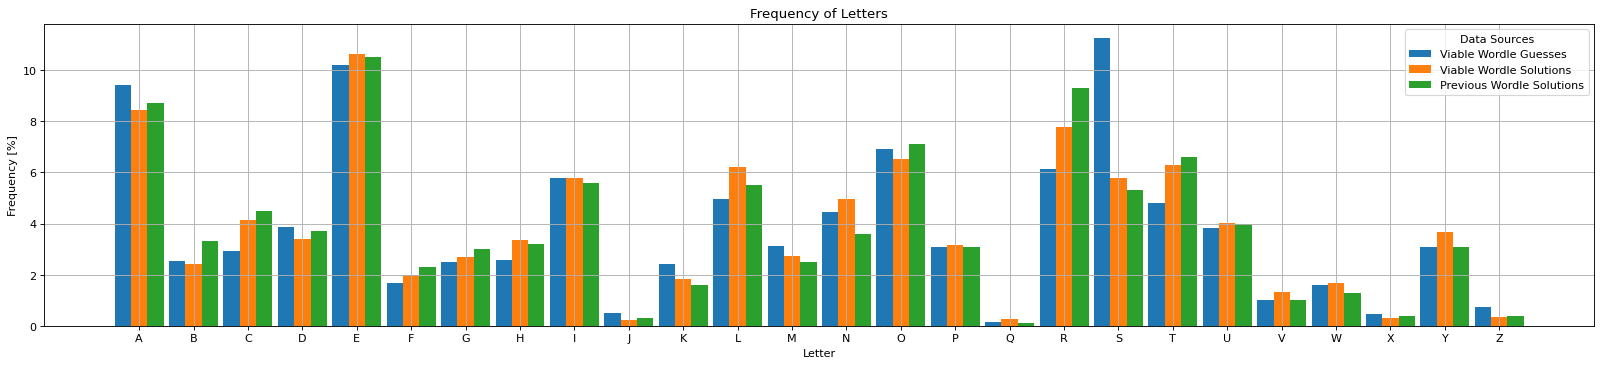

In [12]:
plt.figure(figsize=(25,5), dpi=80)
wd = 0.3
X_letter = np.arange(len(df_vg_freq))
plt.bar(X_letter-wd, df_vg_freq[6], width=wd)
plt.bar(X_letter, df_vs_freq[6], width=wd)
plt.bar(X_letter+wd, df_pw_freq[6], width=wd)
plt.xticks(X_letter, df_vg_freq['index'])
plt.title('Frequency of Letters')
plt.xlabel('Letter')
plt.ylabel('Frequency [%]')
plt.legend(['Viable Wordle Guesses', 'Viable Wordle Solutions', 'Previous Wordle Solutions'], title='Data Sources')
plt.grid()
plt.show()

Making a function to count the number of each letter occurrence and make a new dataset with columns letter and count and use that function for the total dataset and each column of the data.

Plotting the data for total letter occurrence.

Plotting each letter slot for each letter occurrence.